8. Visualization-Focused Questions



•	Can you visualize the top 10 most dangerous intersections or streets in the U.S.?


Number of NA values in 'Street' column: 10869

Counts of accidents by street type:
Street_Type
Avenue        591796
Boulevard     321258
Circle         13495
Court         241830
Drive         314135
Highway       495555
Lane           98970
Other        3717640
Pike           74480
Place           1447
Street       1826760
Terrace        20159
Unknown        10869
Name: Severity, dtype: int64

Total accidents counted: 7728394


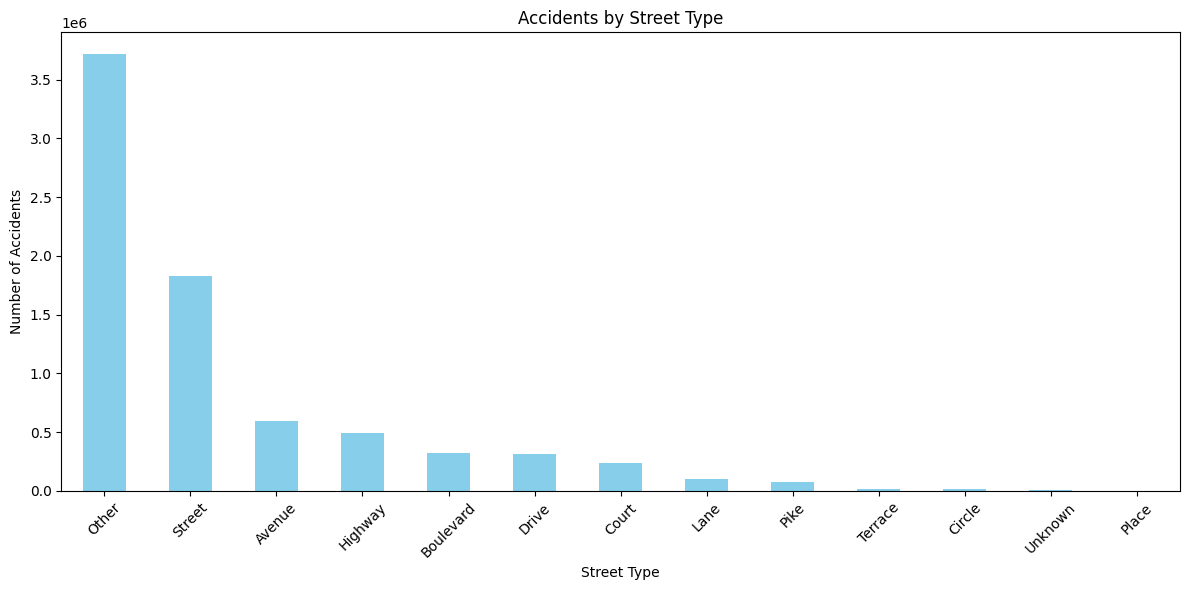

In [8]:
import dask.dataframe as dd
import pandas as pd
import re
import matplotlib.pyplot as plt

# Load the dataset
df = dd.read_parquet('/Users/er/Desktop/Data Analysis/Projects/Python/US Accidents/USTrafficAccidents/Data/Parquet/US_Accidents_March23.parquet')

# Define a function to classify street types
def classify_street_type(street):
    if pd.isna(street):  # Check for NA values
        return 'Unknown'  # Assign 'Unknown' for NA values
    elif re.search(r'\bSt\b|\bStreet\b|\bSt.\b|\bS\b', street, re.IGNORECASE):
        return 'Street'
    elif re.search(r'\bAve\b|\bAvenue\b|\bAv.\b|\bA.\b', street, re.IGNORECASE):
        return 'Avenue'
    elif re.search(r'\bDr\b|\bDrive\b|\bDr.\b|\bD.\b', street, re.IGNORECASE):
        return 'Drive'
    elif re.search(r'\bPike\b|\bPk\b|\bP.\b', street, re.IGNORECASE):
        return 'Pike'
    elif re.search(r'\bHighway\b|\bHwy\b|\bHwy.\b|\bH.\b', street, re.IGNORECASE):
        return 'Highway'
    elif re.search(r'\bBlvd\b|\bBoulevard\b|\bBlvd.\b|\bB.\b', street, re.IGNORECASE):
        return 'Boulevard'
    elif re.search(r'\bLn\b|\bLane\b|\bLn.\b|\bL.\b', street, re.IGNORECASE):
        return 'Lane'
    elif re.search(r'\bCt\b|\bCourt\b|\bCt.\b|\bC.\b', street, re.IGNORECASE):
        return 'Court'
    elif re.search(r'\bPl\b|\bPlace\b|\bPl.\b|\bP.\b', street, re.IGNORECASE):
        return 'Place'
    elif re.search(r'\bTer\b|\bTerrace\b|\bTer.\b|\bT.\b', street, re.IGNORECASE):
        return 'Terrace'
    elif re.search(r'\bCir\b|\bCircle\b|\bCir.\b|\bC.\b', street, re.IGNORECASE):
        return 'Circle'
    else:
        return 'Other'

# Apply the classification function to the 'Street' column
df['Street_Type'] = df['Street'].map(classify_street_type, meta=('x', 'object'))

# Count NA values in 'Street' column
na_count = df['Street'].isna().sum().compute()
print(f"Number of NA values in 'Street' column: {na_count}")

# Aggregate accidents by street type
accidents_by_street_type = df.groupby('Street_Type')['Severity'].count().compute()

# Print the counts per street type
print("\nCounts of accidents by street type:")
print(accidents_by_street_type)

# Sort the results for better visualization
accidents_by_street_type = accidents_by_street_type.sort_values(ascending=False)

# Ensure the total count matches expected shape
total_accidents = accidents_by_street_type.sum()
print(f"\nTotal accidents counted: {total_accidents}")

# Plotting the results
plt.figure(figsize=(12, 6))
accidents_by_street_type.plot(kind='bar', color='skyblue')

# Formatting the plot
plt.title('Accidents by Street Type')
plt.xlabel('Street Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

•	How does the severity of accidents differ when mapped geographically?


•	Can you create an interactive dashboard that lets users filter accident data by state, year, and severity?

Tableau